## Fantasy distribution

### Imports

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Settings

In [16]:
%matplotlib inline
sns.set()
pd.options.display.max_columns = None

### Api Requests

In [4]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
response = requests.get(url)
json = response.json()

### Build DataFrames

In [5]:
elements_df = pd.DataFrame(json['elements'])
elements_df.shape

(667, 67)

In [6]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Özil,1,3,0.5,67,0,3441,0.0,0
1,Papastathopoulos,1,2,0.1,48,0,10266,0.0,0
2,Luiz Moreira Marinho,1,2,0.8,54,886,51064,4.6,25
3,Aubameyang,1,3,6.5,113,1574,581440,6.5,73
4,Soares,1,2,0.3,46,429,22560,5.0,23


### Map Position

In [7]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
slim_elements_df = slim_elements_df.drop(columns=['element_type'])
slim_elements_df.head()

<ipython-input-7-4b0967ab254e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)


,second_name,team,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Özil,1,0.5,67,0,3441,0.0,0,Midfielder
1,Papastathopoulos,1,0.1,48,0,10266,0.0,0,Defender
2,Luiz Moreira Marinho,1,0.8,54,886,51064,4.6,25,Defender
3,Aubameyang,1,6.5,113,1574,581440,6.5,73,Midfielder
4,Soares,1,0.3,46,429,22560,5.0,23,Defender


### Map Team

In [8]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
slim_elements_df.head()

,second_name,team,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Özil,Arsenal,0.5,67,0,3441,0.0,0,Midfielder
1,Papastathopoulos,Arsenal,0.1,48,0,10266,0.0,0,Defender
2,Luiz Moreira Marinho,Arsenal,0.8,54,886,51064,4.6,25,Defender
3,Aubameyang,Arsenal,6.5,113,1574,581440,6.5,73,Midfielder
4,Soares,Arsenal,0.3,46,429,22560,5.0,23,Defender


### Convert value to float

In [21]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)
slim_elements_df.sort_values('value',ascending=False).head(10)

,second_name,team,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
33,Martínez,Aston Villa,35.2,52,1890,3201789,22.3,116,Goalkeeper,22.3
300,Dallas,Leeds,15.3,48,1970,1766124,19.8,95,Defender,19.8
618,Soucek,West Ham,17.8,54,2070,2395232,19.6,106,Midfielder,19.6
284,Justin,Leicester,26.9,52,2070,2909298,19.4,101,Defender,19.4
48,Targett,Aston Villa,8.8,48,1874,1023780,19.2,92,Defender,19.2
302,Bamford,Leeds,51.2,68,1875,6089250,19.1,130,Forward,19.1
313,Meslier,Leeds,5.6,47,1890,754822,18.9,89,Goalkeeper,18.9
605,Cresswell,West Ham,25.4,57,2070,2581103,18.6,106,Defender,18.6
121,Pope,Burnley,14.8,55,1890,822446,18.5,102,Goalkeeper,18.5
303,Harrison,Leeds,2.3,54,1755,565891,17.6,95,Midfielder,17.6


In [22]:
slim_elements_df.sort_values('total_points',ascending=False).head(10)

,second_name,team,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
404,Borges Fernandes,Man Utd,59.5,115,1925,5215081,14.7,169,Midfielder,14.7
536,Son,Spurs,53.8,96,1886,6519286,16.1,155,Midfielder,16.1
339,Salah,Liverpool,43.1,126,1831,4773900,12.3,155,Midfielder,12.3
534,Kane,Spurs,21.3,110,1744,4813788,13.7,151,Forward,13.7
302,Bamford,Leeds,51.2,68,1875,6089250,19.1,130,Forward,19.1
43,Grealish,Aston Villa,39.9,78,1887,5239053,16.3,127,Midfielder,16.3
211,Calvert-Lewin,Everton,42.8,77,1763,6972515,15.6,120,Forward,15.6
270,Vardy,Leicester,14.6,100,1505,3572150,11.7,117,Forward,11.7
33,Martínez,Aston Villa,35.2,52,1890,3201789,22.3,116,Goalkeeper,22.3
457,Wilson,Newcastle,15.9,67,1812,3998858,17.3,116,Forward,17.3


### Position Distribution Plot

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midfielder'),
  Text(1, 0, 'Defender'),
  Text(2, 0, 'Forward'),
  Text(3, 0, 'Goalkeeper')])

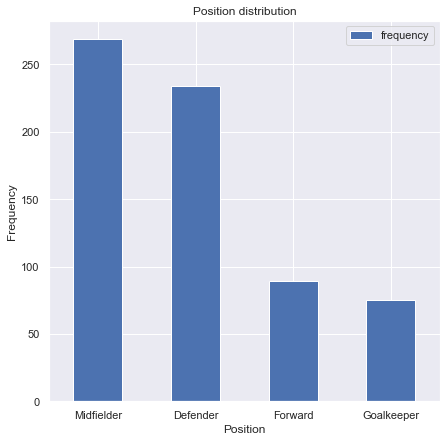

In [10]:
distrib_position = slim_elements_df['position'].value_counts().reset_index()
distrib_position.columns = ['position', 'frequency']
distrib_position = distrib_position.set_index('position')
distrib_position.plot(kind='bar', figsize=(7,7))
plt.title("Position distribution")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.xticks(rotation=0, horizontalalignment="center")

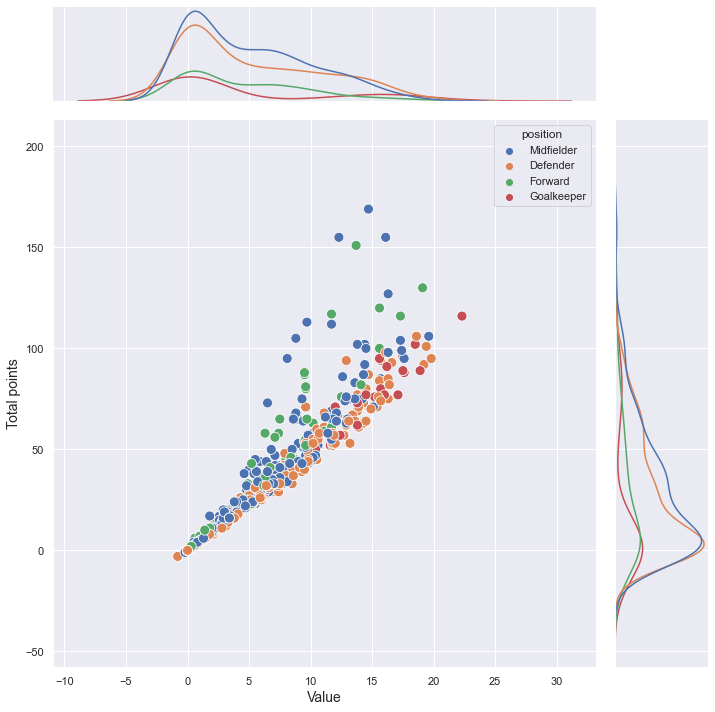

In [29]:
plot = sns.JointGrid(
    data = slim_elements_df, 
    x = 'value', y = 'total_points', 
    height = 10, 
    hue = "position"
)
plot.set_axis_labels('Value', 'Total points', fontsize=14)
plot.plot_joint(sns.scatterplot, s=100)
plot.plot_marginals(sns.kdeplot)